In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#altri import futuri

## Caricamento e analisi del dataset

In [3]:
dataset = pd.read_csv("dataset/secondary_data.csv", sep=";")
print("Dimension:", dataset.shape)
dataset.head()

Dimension: (61069, 21)


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

### Distribuzione delle features
Siamo interessati a classificare i funghi come velenosi o meno, per questo motivo identifichiamo le due classi di interesse a partire dalla colonna "class" del dataset.

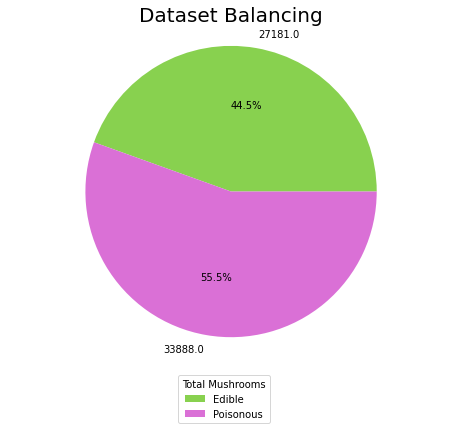

In [33]:
classes = [{"Commestibili": (dataset["class"] == "e").sum(), "Velenosi": (dataset["class"] == "p").sum()}]
total  = pd.DataFrame(classes)
total_e = float(total["Commestibili"])
total_p = float(total["Velenosi"])
mushrooms = [total_e, total_p]
mushrooms_labels = 'Edible','Poisonous'
fig, ax = plt.subplots(figsize = (8,6))
plt.pie(mushrooms,labels=mushrooms,autopct='%1.1f%%',colors = ['#88d14f', '#DA70D6'])
plt.title('Dataset Balancing', loc = "center", fontsize="20")
plt.axis('equal')
plt.legend(mushrooms_labels,title="Total Mushrooms",bbox_to_anchor=(0.6, -0.05, 0, 0))
fig.set_facecolor('white')
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

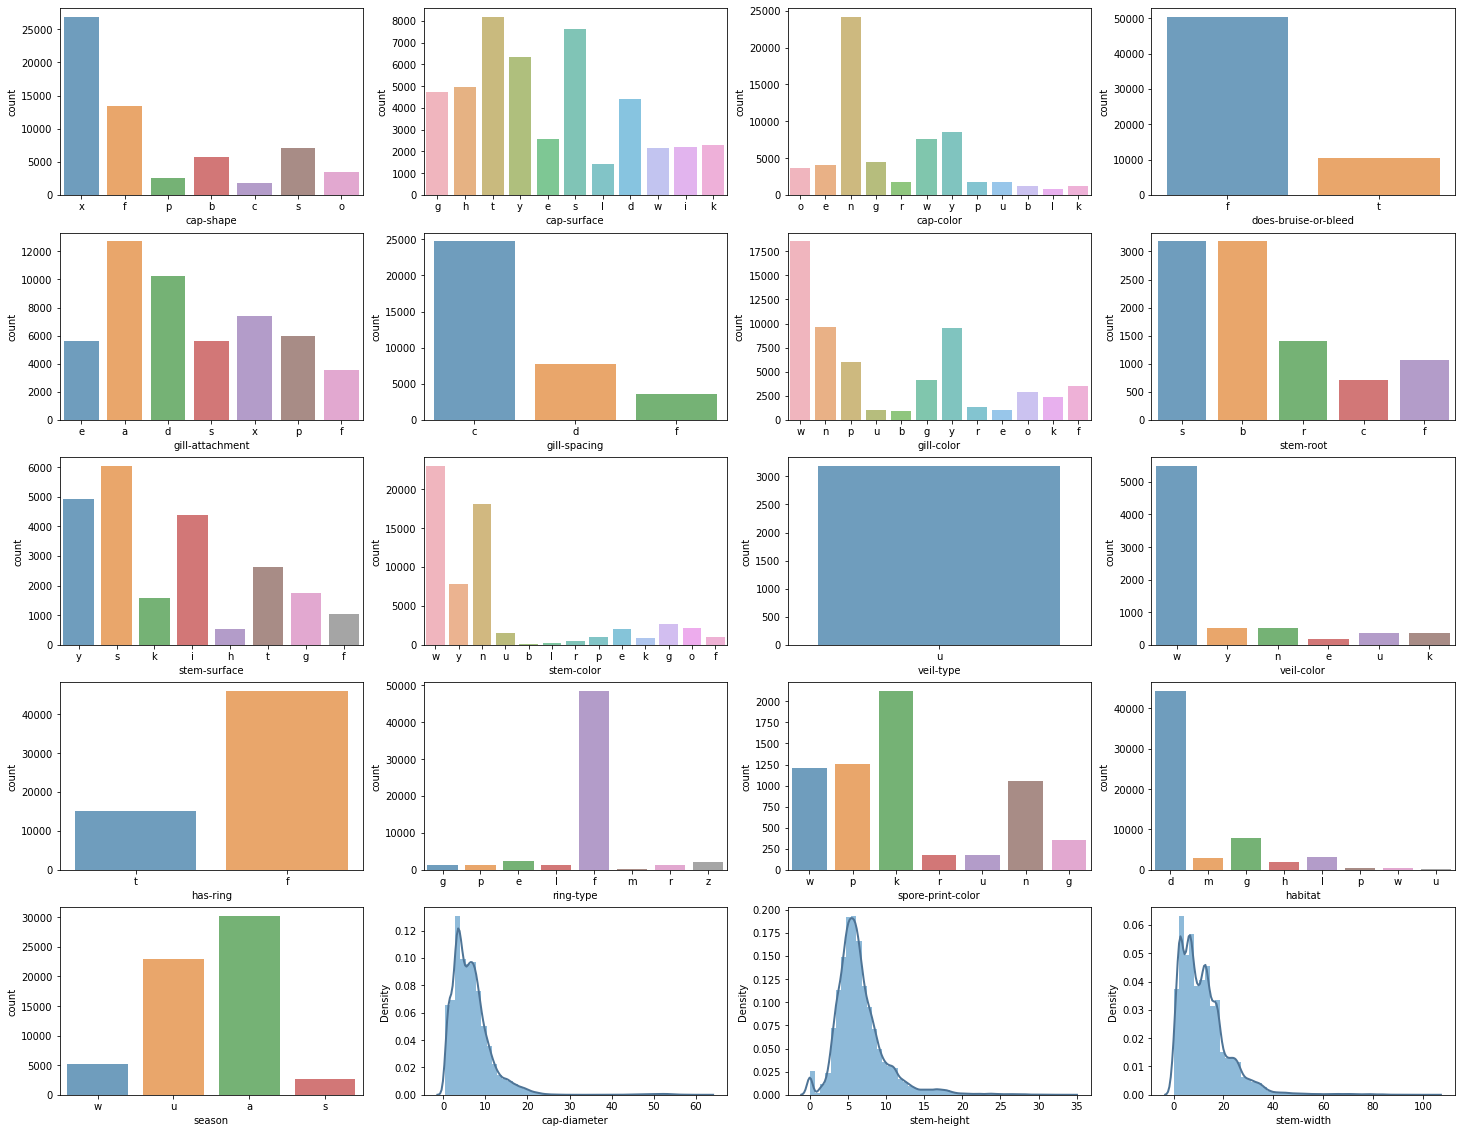

In [ ]:
categorical = ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 
'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']
continous = ['cap-diameter', 'stem-height', 'stem-width']

fig = plt.figure(figsize=(25,20))
for i in range(0, len(categorical)) :
    fig.add_subplot(5,4,i+1)
    sns.countplot(x=categorical[i], data=dataset, alpha=.7)

for col in continous:
    fig.add_subplot(5,4,i+2)
    i+=1
    sns.distplot(dataset[col].dropna(), kde_kws={"lw": 2, "color": 'xkcd:cadet blue'}, hist_kws={"alpha": .5})

## Rimozione di features con dati nulli
Si rimuovono le features con varianza nulla presenti nel dataset, ovvero quelle features il cui valore è costante, nel nostro caso solamente la variabile "veil-type" come visibile graficamente.

In [ ]:
dataset = dataset.drop("veil-type", 1)
dataset.isnull().sum()

/tmp/ipykernel_6741/3082125834.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset = dataset.drop("veil-type", 1)


class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

Si cancellano le features che presentano valori nulli per più del 20%, utilizzando invece un meccanismo di imputazione per sopperire alla presenza di dati mancanti in quelle features da scartare ma che hanno buona correlazione (vd. dopo) con la variabile target e buona distribuzione dei valori.

In [ ]:
dataset = dataset.drop("veil-color", 1)
dataset = dataset.drop("spore-print-color", 1)
dataset = dataset.drop("stem-root", 1)
dataset.head()

/tmp/ipykernel_6741/2386318944.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset = dataset.drop("veil-color", 1)
/tmp/ipykernel_6741/2386318944.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset = dataset.drop("spore-print-color", 1)
/tmp/ipykernel_6741/2386318944.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset = dataset.drop("stem-root", 1)


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,y,w,t,g,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,y,w,t,g,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,y,w,t,g,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,y,w,t,p,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,y,w,t,p,d,w


Conversione delle features categoriche in nominali, si modifica prima il tipo di dato dei valori delle features da 'object' in 'category' per poi procedere con l'effettiva trasformazione dei valori categorici.

In [ ]:
dataset = dataset.astype({"class": 'category', "cap-shape": 'category', "cap-surface": 'category', "cap-color": 'category', "does-bruise-or-bleed": 'category', 
"gill-attachment": 'category', "gill-spacing": 'category', "gill-color": 'category', "stem-surface": 'category', "stem-color": 'category',  "has-ring": 'category', 
"ring-type": 'category', "habitat": 'category', "season": 'category'}, errors = 'raise')
dataset.dtypes

class                   category
cap-diameter             float64
cap-shape               category
cap-surface             category
cap-color               category
does-bruise-or-bleed    category
gill-attachment         category
gill-spacing            category
gill-color              category
stem-height              float64
stem-width               float64
stem-surface            category
stem-color              category
has-ring                category
ring-type               category
habitat                 category
season                  category
dtype: object


Si trasformano i valori categorici in numerici (int64) e si salva il dizionario che mantiene il mapping per un eventuale utilizzo futuro.

In [ ]:
mapping = []
encoder = LabelEncoder()
for i in range(len(dataset.columns)):
    value = dataset[dataset.columns[i]] 
    if (value.dtype == "category"):
        print(value)
        dataset[dataset.columns[i]] = encoder.fit_transform(value)
        mapping_dict = {index : label for index , label in enumerate(encoder.classes_)}
        mapping.append(mapping_dict)

mapping

0        p
1        p
2        p
3        p
4        p
        ..
61064    p
61065    p
61066    p
61067    p
61068    p
Name: class, Length: 61069, dtype: category
Categories (2, object): ['e', 'p']
0        x
1        x
2        x
3        f
4        x
        ..
61064    s
61065    f
61066    s
61067    f
61068    s
Name: cap-shape, Length: 61069, dtype: category
Categories (7, object): ['b', 'c', 'f', 'o', 'p', 's', 'x']
0        g
1        g
2        g
3        h
4        h
        ..
61064    s
61065    s
61066    s
61067    s
61068    s
Name: cap-surface, Length: 61069, dtype: category
Categories (11, object): ['d', 'e', 'g', 'h', ..., 's', 't', 'w', 'y']
0        o
1        o
2        o
3        e
4        o
        ..
61064    y
61065    y
61066    y
61067    y
61068    y
Name: cap-color, Length: 61069, dtype: category
Categories (12, object): ['b', 'e', 'g', 'k', ..., 'r', 'u', 'w', 'y']
0        f
1        f
2        f
3        f
4        f
        ..
61064    f
61065    f
6

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'o', 4: 'p', 5: 's', 6: 'x'},
 {0: 'd',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'i',
  5: 'k',
  6: 'l',
  7: 's',
  8: 't',
  9: 'w',
  10: 'y',
  11: nan},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'k',
  4: 'l',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'd', 2: 'e', 3: 'f', 4: 'p', 5: 's', 6: 'x', 7: nan},
 {0: 'c', 1: 'd', 2: 'f', 3: nan},
 {0: 'b',
  1: 'e',
  2: 'f',
  3: 'g',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'f', 1: 'g', 2: 'h', 3: 'i', 4: 'k', 5: 's', 6: 't', 7: 'y', 8: nan},
 {0: 'b',
  1: 'e',
  2: 'f',
  3: 'g',
  4: 'k',
  5: 'l',
  6: 'n',
  7: 'o',
  8: 'p',
  9: 'r',
  10: 'u',
  11: 'w',
  12: 'y'},
 {0: 'f', 1: 't'},
 {0: 'e', 1: 'f', 2: 'g', 3: 'l', 4: 'm', 5: 'p', 6: 'r', 7: 'z', 8: nan},
 {0: 'd', 1: 'g', 2: 'h', 3: 'l', 4: 'm', 5: 'p', 6: 'u', 7: 'w'},
 {0: 'a', 1: 's', 2: 'u', 3: 'w'}]

Dataset aggiornato a seguito della trasformazione dei valori categorici.

In [66]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest



colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']

In [ ]:
datasetdf.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [ ]:
dataset.isnull().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-surface            0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

### Imputazione delle features con valori nulli
Si utilizza un meccanismo di imputazione per sopperire alla presenza di dati mancanti per le features da scartare per la politica scelta (nan > 20%), ma che presentano una buona correlazione con la variabile target e una buona distribuzione dei valori.
Ovviamente il meccanismo è applicato anche a quelle features con meno del 20% di valori nulli, così da ripristinare la variabile per l'uso nella classificazione rimpiazzando tutti i dati mancanti.

IMPUTAZIONE PER: cap-surface,14120 | gill-attachment,9884 | gill-spacing,25063 | stem-surface,38124 | ring-type,2471

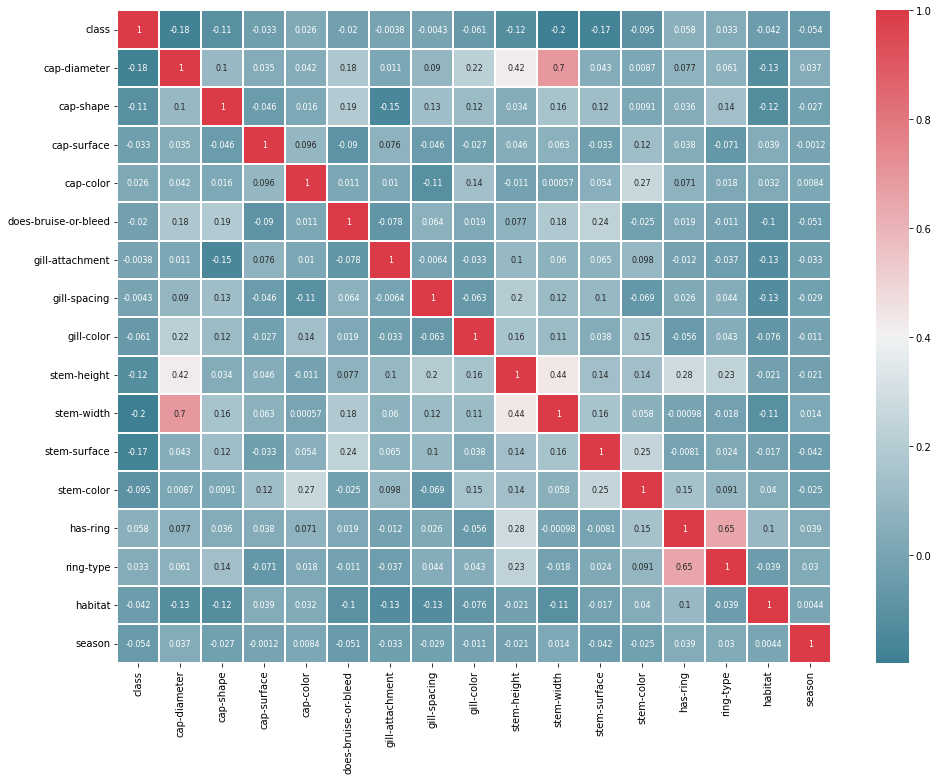

In [ ]:
plt.figure(figsize=(16,12))

sns.heatmap(dataset.corr(), linewidths=.1, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, annot_kws={"size": 8})

plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=400, bbox_inches='tight')

# Data Exploration

In [95]:
i=0
for column in df.columns:
    df[column].dropna
    print("{:<2} {:<30} {}".format(i, column, len(df[column])))
    i+=1

0  class                          61069
1  cap-diameter                   61069
2  cap-shape                      61069
3  cap-surface                    61069
4  cap-color                      61069
5  does-bruise-or-bleed           61069
6  gill-attachment                61069
7  gill-spacing                   61069
8  gill-color                     61069
9  stem-height                    61069
10 stem-width                     61069
11 stem-root                      61069
12 stem-surface                   61069
13 stem-color                     61069
14 veil-type                      61069
15 veil-color                     61069
16 has-ring                       61069
17 ring-type                      61069
18 spore-print-color              61069
19 habitat                        61069
20 season                         61069


## Visualizzazione del numero delle classi del dataset 

## Distribuzione Colonne

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "Mushrooms"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
plotPerColumnDistribution(df, 19, 1)
#plotScatterMatrix(df,10,5)
#plotCorrelationMatrix(df, 10)ty+ù

ValueError: Number of rows must be a positive integer, not 17.0

<Figure size 480x10880 with 0 Axes>

C:\Users\mich\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


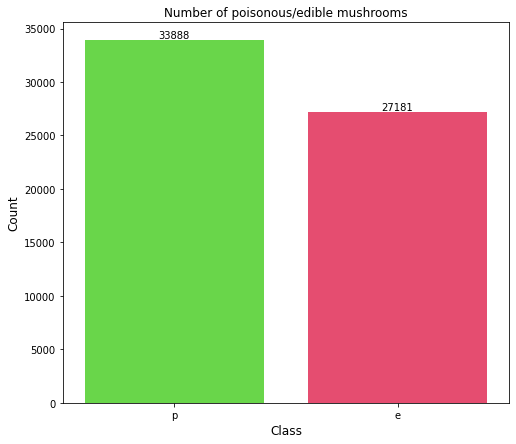

In [28]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
#barplot(x = count.index p/e , y = count.values valori di p/e)
ax = sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
ax.bar_label(ax.containers[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
#plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

Show the counts of observations in each categorical bin using bars

C:\Users\mich\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mich\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mich\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\l

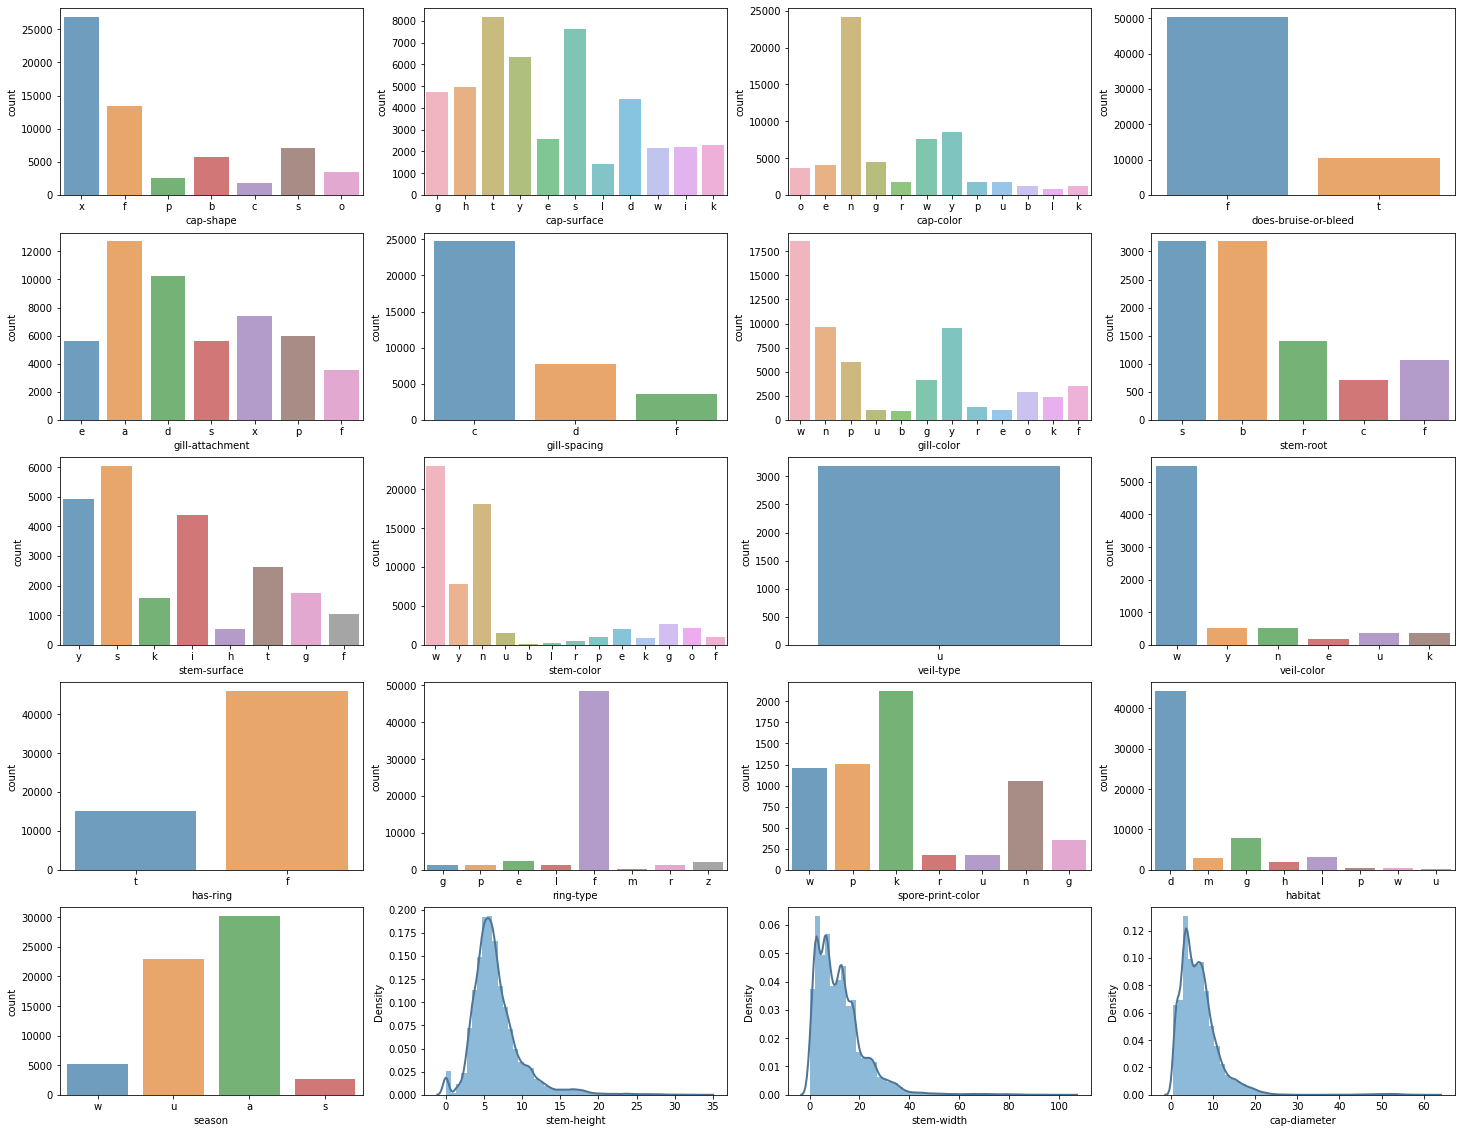

In [46]:
categ =  [ 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']
conti = ['stem-height', 'stem-width', 'cap-diameter']

fig = plt.figure(figsize=(25,20))
for i in range(0, len(categ)):
    fig.add_subplot(5,4,i+1)
    sns.countplot(x=categ[i], data=df, alpha=.7) 

for col in conti:
    fig.add_subplot(5,4,i+2)
    i+=1
    sns.distplot(df[col].dropna(), kde_kws={"lw": 2, "color":colors[8]}, 
                hist_kws={"alpha": .5})


## Feature Selection

Mappiano le feature categoriche bla bla

In [125]:
mapping = []
encoder = LabelEncoder()

data = df.astype({"class": 'category', "cap-shape": 'category', "cap-surface": 'category', "cap-color": 'category', "does-bruise-or-bleed": 'category', 
"gill-attachment": 'category', "gill-spacing": 'category', "gill-color": 'category', "stem-root": 'category', "stem-surface": 'category', "stem-color": 'category', 
"veil-type": 'category', "veil-color": 'category', "has-ring": 'category', "ring-type": 'category', "spore-print-color": 'category', "habitat": 'category', 
"season": 'category'}, errors = 'raise')

for i in range(len(data.columns)):
    value = data[data.columns[i]]
    if (value.dtype == "category"):
        if (pd.isnull(value)):
            value = encoder.fit_transform(value)
            mapping_dict = {index : label for index , label in enumerate(encoder.classes_)}
            mapping.append(mapping_dict)

print(mapping[6])

{0: 'c', 1: 'd', 2: 'f', 3: nan}


Primo approccio base di feature selection andiamo a rimuovere le feature con varianza nulla presenti nel dataset, ovvero quelle features il cui valore è costante.   
Dalla fase di Data Visualization abbiamo notato che una features con varianza nulla è il veil-type.   
#TODO Valutare l'utilizzo di una VarianceThreshold from SkLearn per rimuovere le features con varianza bassa

Secondo approccio:  
Cancelliamo features i cui valori nulli sono maggiori del 20%

In [87]:
data = data.drop(columns='veil-type')
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1,15.26,6,2,6,0,2,3,10,16.95,17.09,4,7,11,4,1,2,7,0,3
1,1,16.60,6,2,6,0,2,3,10,17.99,18.19,4,7,11,4,1,2,7,0,2
2,1,14.07,6,2,6,0,2,3,10,17.80,17.74,4,7,11,4,1,2,7,0,3
3,1,14.17,2,3,1,0,2,3,10,15.77,15.98,4,7,11,4,1,5,7,0,3
4,1,14.64,6,3,6,0,2,3,10,16.53,17.20,4,7,11,4,1,5,7,0,3


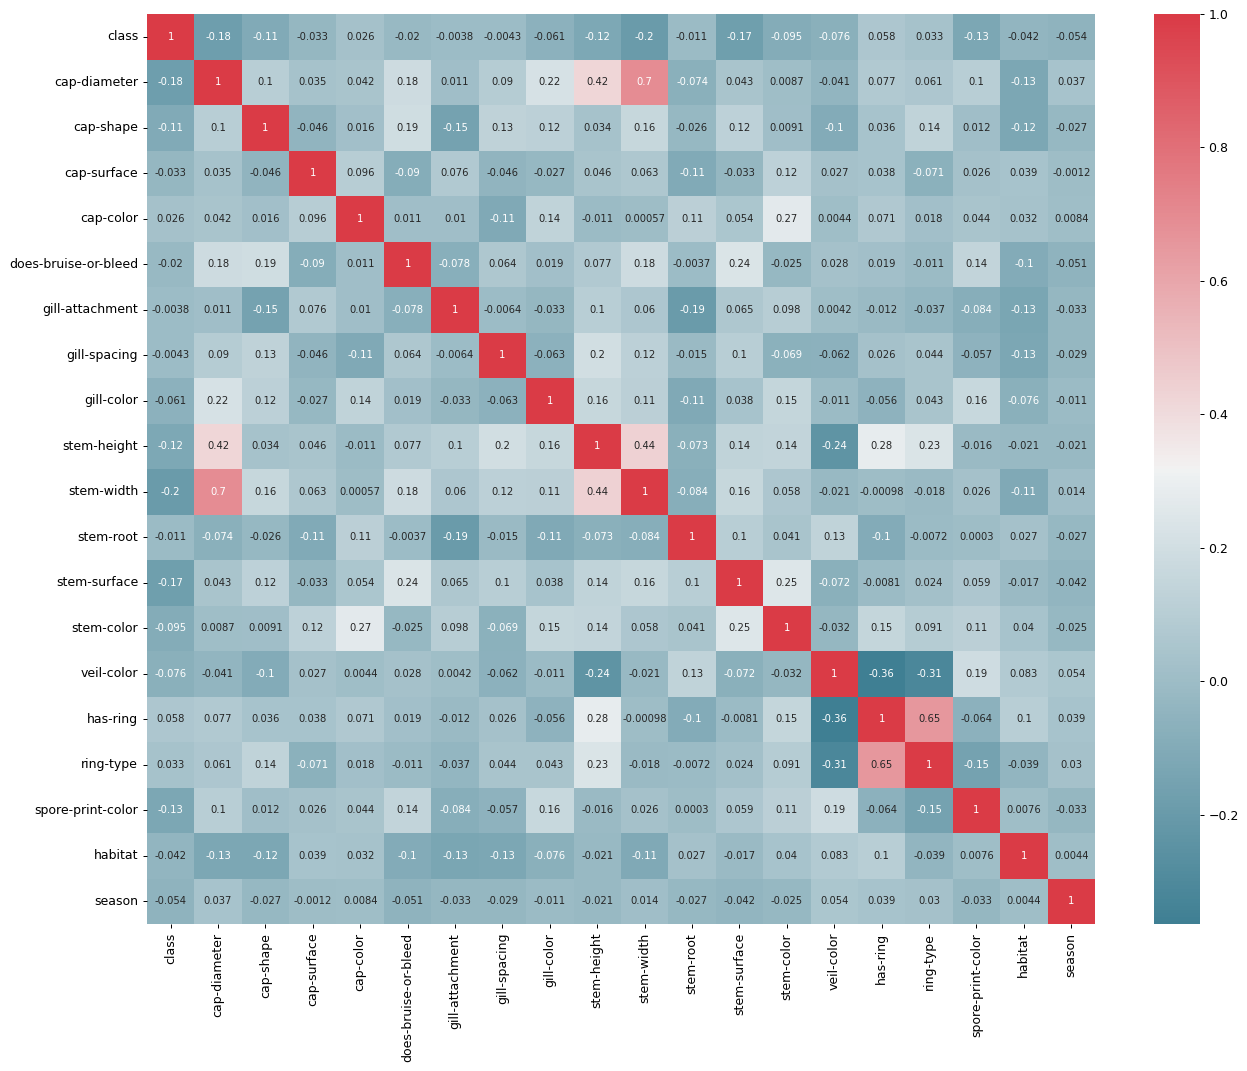

In [88]:
plt.figure(figsize=(15, 12), dpi=90)
sns.heatmap(data.corr(), cmap = sns.diverging_palette(220, 10, as_cmap=True), annot=True, annot_kws={"size":8})
plt.tight_layout()
plt.show()

### Multivariate Feature Imputation

In [118]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer

#imp = SimpleImputer(strategy="most_frequent")
imp = KNNImputer(n_neighbors=1)

data_2 = pd.DataFrame(imp.fit_transform(data), )
print(data_2[7].value_counts())

ValueError: could not convert string to float: 'p'

In [116]:
df['gill-spacing'].value_counts()

c    24710
d     7766
f     3530
Name: gill-spacing, dtype: int64